# 1.Problem Formulation


Predicting if a given dish is a Main course or Dessert is the machine learning problem that I would most like to solve. This problem caught my attention because, although almost every one of the dishes in our MLEnd dataset look appetizing, sometimes it can be difficult to determine from the picture whether they are a Main course or a Dessert. Therefore, I thought I could investigate how the machine is solving this problem by using text processing instead of image processing.


# 2.Machine Learning Pipeline
Pipeline has some following stages:


**Data Sampling and Processing**


1.I downloaded 99 dishes in all, totaling 3250 photos, from the MLend library and saved them in a csv file format.

2.To get decent accuracy, I then divided my dataset equally between dessert and main course dishes.

3.I split the dataset into two groups: 29 for testing and 70 for training.

4.Next, data was extracted from the CSV file and stored in arrays called x_train, x_test, y_train, and y_test.

**Transformation**

The data string-containing arrays x_train and x_test were converted into arrays of matrices of token counts (x_train_CV and x_test_CV) using CountVectorizer from scikit-learn, and y_train and y_test were mapped to numerical values 0 and 1 using LabelEncoder from scikit-learn.

**Modeling part**

My selected model is **Logistic Regression** because it is the best fit for my problem out of some algorithms I tested, such as Random Forest and SVM. This problem is a binary classification problem that seeks the machine to predict if the ingredients of a dish is a dessert or a main course.

**Methodology**

The model will be trained using the array that holds the encoded y_train labels and the matrix of token counts. Next, the model makes predictions for the training and testing sets. The accuracy of the predictions is checked and the model's overfitting or underfitting is confirmed using the mean of these predictions.

A confusion matrix is created to see how well the model can predict whether the list of ingredients for a dish is a main course or a dessert in order to further validate its prediction.

**Results**

The Logistic Regression model has the highest prediction accuracy and the highest values for true positive and true negative values, according to the confusion matrix and prediction accuracy.

**Conclusion**

This leads us to the conclusion that our problem statement can be resolved by binary classification using text processing. More advancements could be achieved by employing models trained with Deep Learning and a bigger dataset to better identify intricate patterns in the data.By carrying out research and gaining additional data insights, we are able to extract data features even more accurately for predictions in the future.





# 3.Dataset

A selection of 99 dishes, selected from the 3250 dishes available on GitHub, are placed into an CSV file and uploaded to Google Drive under the 'My_Data' folder. Of these, 50 are designated as dessert, while the remaining 50 are main course. 30 of the dishes were splited as testing, and 70 as training. Next, the information was taken out of the CSV file and organized into arrays labeled x_train, x_test, y_train, and y_test.

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/My_Data/MyYummy_Tummy.csv')

df_main_dish_dessert = df[['Ingredients','Benchmark_A']]
df_main_dish_dessert_label = df[['Dessert_Maincourse']]

df_x_train = df_main_dish_dessert.loc[df['Benchmark_A']=='Train']
df_x_test = df_main_dish_dessert.loc[df['Benchmark_A']=='Test']
df_y_train = df_main_dish_dessert_label.loc[df['Benchmark_A']=='Train']
df_y_test = df_main_dish_dessert_label.loc[df['Benchmark_A']=='Test']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(-0.5, 4031.5, 3023.5, -0.5)

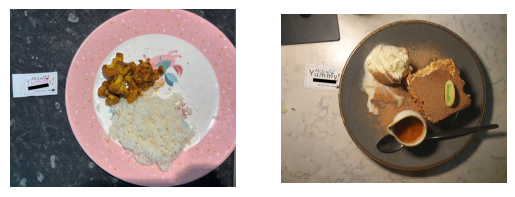

In [ ]:
I = plt.imread('/content/drive/MyDrive/My_Data/MyYummy_Tummy_Images/000035.jpg')
plt.subplot(1,2,1)
plt.imshow(I)
plt.axis('off')

I = plt.imread('/content/drive/MyDrive/My_Data/MyYummy_Tummy_Images/000473.jpg')
plt.subplot(1,2,2)
plt.imshow(I)
plt.axis('off')

In [ ]:
df_x_train.head()

,Ingredients,Benchmark_A
0,"choclate,cocoa_mass,sugar,cocoa_butter,milk,sk...",Train
2,"rice,onion,chilli,tomato,oil,pickle",Train
4,"double_cream,mascarpone,marsala,golden_caster_...",Train
7,"yoghurt,sugar",Train
9,"rice,cabbage,beans,red_onion,coriander,carrot,...",Train


In [ ]:
df_y_train.head()

,Dessert_Maincourse
0,dessert
2,dessert
4,dessert
7,dessert
9,main_course


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

x_train = df_x_train['Ingredients'].to_numpy()
x_test =  df_x_test['Ingredients'].to_numpy()
y_train = label_encoder.fit_transform(df_y_train['Dessert_Maincourse'].to_numpy())
y_test = label_encoder.fit_transform(df_y_test['Dessert_Maincourse'].to_numpy())

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Label Mapping:", label_mapping)

Label Mapping: {'dessert': 0, 'main_course': 1}


In [ ]:
x_train[6]

'semolina,clarified_butter,sugar,water,milk,cardamom_powder,cashews,raisins,saffron_strands,sliced_almonds'

In [ ]:
y_train[6]

0

In [ ]:
x_test[1]

'rice,toor_dal,potato,yogurt,spices'

In [ ]:
y_test[1]

1

# 4. Transformation Stage

To extract the feature of counting the number of words that appear in the data, utilized scikit-learn's CountVectorization. I selected this transformation step to look for trends in the frequency with which items from the main course list, such as rice and spices, appear in comparison to items like sugar and milk in the dessert list. It accepts a string-formatted array of ingredients as input and outputs a matrix with token counts for each word in the array.



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')

def comma_tokenizer(text):
    return text.split(',')

count_vectorizer = CountVectorizer(tokenizer=comma_tokenizer)

x_train_CV = count_vectorizer.fit_transform(x_train).toarray()
x_test_CV = count_vectorizer.transform(x_test).toarray()

In [ ]:
x_train_CV[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
x_test_CV[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
print(f'Number of data points for training: {len(x_train)}')
print(f'Number of data points for testing: {len(x_test)}')

Number of data points for training: 70
Number of data points for testing: 29


# 5. Modeling

As they can solve binary classification problems, I have selected logistic regression, linear SVC and Random Forest. however, their accuracy will be evaluated in relation to this problem's context before I decide which model to use.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

model_1 = LogisticRegression(C=0.1)
model_2 = RandomForestClassifier(n_estimators=5,max_depth=3)
model_3 = LinearSVC(C=1)
model_1.fit(x_train_CV, y_train)
model_2.fit(x_train_CV, y_train)
model_3.fit(x_train_CV, y_train)

LinearSVC(C=1)

# 6.Methodology

The models will be trained using the x_train_CV, which contains the encoded y_train labels and the matrix of token counts. Subsequently, the models will forecast for the training (x_train_CV) and testing (x_test_CV) sets. The models' average prediction will be utilized to verify that the models are accurate and not overfitting or underfitting. A confusion matrix is created to see how well the models can predict whether the ingredients on the list belongs to dessert or the main course in order to further validate its prediction. I will select the model based on its ability to accurately predict without under- or overfitting.

# 7.Results

The Logistic Regression model has the highest prediction accuracy and the highest values for true positive and true negative values, according to the confusion matrix and prediction accuracy.

In [ ]:
import matplotlib.pyplot as plt

def showConfMat(CM, labels = ['Dessert','Main_Course']):
  plt.matshow(CM,cmap='Blues')
  for i in range(CM.shape[0]):
    for j in range(CM.shape[1]):
      plt.text(i,j,CM[i,j].round(2),ha='center',)
  plt.xticks([0,1],labels)
  plt.yticks([0,1],labels)
  plt.show()

for LogisticRegression:
Training Accuracy: 0.9142857142857143
Test  Accuracy: 0.7931034482758621


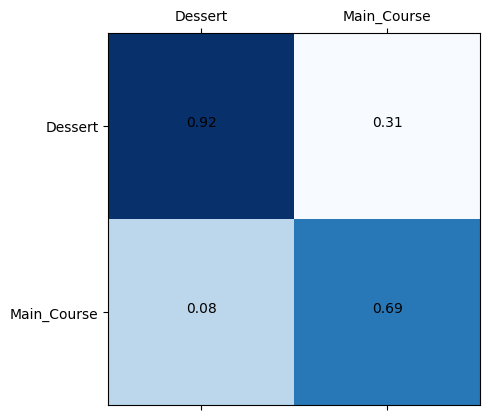


for RandomForestClassifier:
Training Accuracy: 0.8285714285714286
Test  Accuracy: 0.8620689655172413


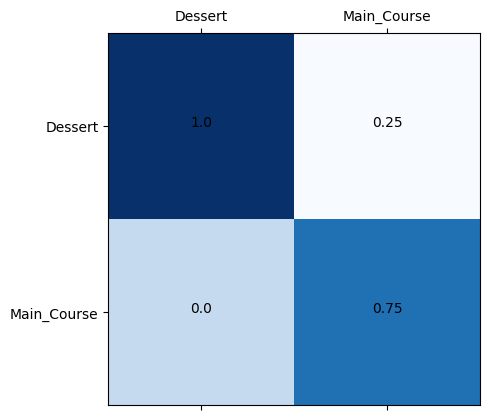


for LinearSVC:
Training Accuracy: 1.0
Test  Accuracy: 0.8275862068965517


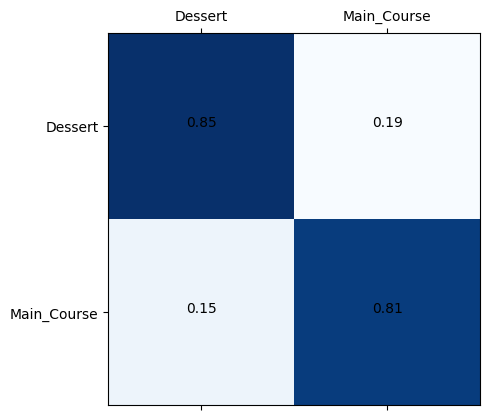

In [ ]:
ytp_1 = model_1.predict(x_train_CV)
ysp_1 = model_1.predict(x_test_CV)

train_accuracy_1 = np.mean(ytp_1==y_train)
test_accuracy_1  = np.mean(ysp_1==y_test)

print('for LogisticRegression:')
print('Training Accuracy:',train_accuracy_1)
print('Test  Accuracy:',test_accuracy_1)

Ac = np.mean(ysp_1[y_test.astype(int)==0]==0)
Ar = np.mean(ysp_1[y_test.astype(int)==1]==1)

Mc = np.mean(ysp_1[y_test.astype(int)==0]==1)
Mr = np.mean(ysp_1[y_test.astype(int)==1]==0)

CM_1 = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM_1)

print("")

ytp_2 = model_2.predict(x_train_CV)
ysp_2 = model_2.predict(x_test_CV)

train_accuracy_2 = np.mean(ytp_2==y_train)
test_accuracy_2  = np.mean(ysp_2==y_test)

print('for RandomForestClassifier:')
print('Training Accuracy:',train_accuracy_2)
print('Test  Accuracy:',test_accuracy_2)

Ac = np.mean(ysp_2[y_test.astype(int)==0]==0)
Ar = np.mean(ysp_2[y_test.astype(int)==1]==1)

Mc = np.mean(ysp_2[y_test.astype(int)==0]==1)
Mr = np.mean(ysp_2[y_test.astype(int)==1]==0)

CM_2 = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM_2)

print("")

ytp_3 = model_3.predict(x_train_CV)
ysp_3 = model_3.predict(x_test_CV)

train_accuracy_3 = np.mean(ytp_3==y_train)
test_accuracy_3  = np.mean(ysp_3==y_test)

print('for LinearSVC:')
print('Training Accuracy:',train_accuracy_3)
print('Test  Accuracy:',test_accuracy_3)

Ac = np.mean(ysp_3[y_test.astype(int)==0]==0)
Ar = np.mean(ysp_3[y_test.astype(int)==1]==1)

Mc = np.mean(ysp_3[y_test.astype(int)==0]==1)
Mr = np.mean(ysp_3[y_test.astype(int)==1]==0)

CM_3 = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM_3)

print("")

# 8.Conclusion

This leads us to the conclusion that our problem statement can be resolved by binary classification using text processing. More advancements could be achieved by employing Deep Learning models and a bigger dataset to better identify intricate patterns in the data. More research on main course and dessert ingredients can be conducted, or an expert can be consulted to correctly preprocess data and choose features.